<a href="https://colab.research.google.com/github/FannyFushayi/Battery_RUL/blob/main/HNEI_DATASET_VER_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is on kaggle and to export the data to our platform we use this code  "Given to us in Kagge"

About Dataset
The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries. The dataset contains the summary of the 14 batteries.

Variables:

Cycle Index: number of cycle
F1: Discharge Time (s)
F2: Time at 4.15V (s)
F3: Time Constant Current (s)
F4: Decrement 3.6-3.4V (s)
F5: Max. Voltage Discharge (V)
F6: Min. Voltage Charge (V)
F7: Charging Time (s)
Total time (s)
RUL: target

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ignaciovinuales/battery-remaining-useful-life-rul")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ignaciovinuales/battery-remaining-useful-life-rul/versions/3


The file is imported as a folder and we need to find the specific csv file within the data

In [ ]:
import os

#list the files in the downloaded directory and state how many csv files there are

downloaded_directory = path
files_in_directory = os.listdir(downloaded_directory)

print("Files in the downloaded directory:")
i = 0
for file_name in files_in_directory:
    if file_name.endswith(".csv"):
        i += 1
        print(file_name)

print("Number of CSV files:", i)



Files in the downloaded directory:
Battery_RUL.csv
Number of CSV files: 1


In [ ]:
import pandas as pd

HNEI_df = pd.read_csv(path+ '/Battery_RUL.csv')
HNEI_df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
HNEI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
HNEI_df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [ ]:
HNEI_df.isnull().sum() #figure out if we have any missing data

,0
Cycle_Index,0
Discharge Time (s),0
Decrement 3.6-3.4V (s),0
Max. Voltage Dischar. (V),0
Min. Voltage Charg. (V),0
Time at 4.15V (s),0
Time constant current (s),0
Charging time (s),0
RUL,0


In [ ]:
HNEI_df.duplicated().sum() #figure out if we have any duplicates

np.int64(0)

In [ ]:
HNEI_df.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


In [ ]:
import numpy as np
HNEI_df.corr()['RUL'].sort_values( key = np.abs, ascending= False) #it seems it's all in the rate of charge and discharge

,RUL
RUL,1.000000
Cycle_Index,-0.999756
Max. Voltage Dischar. (V),0.782800
Min. Voltage Charg. (V),-0.759805
Time at 4.15V (s),0.176514
Time constant current (s),0.040675
Charging time (s),0.018299
Decrement 3.6-3.4V (s),0.011998
Discharge Time (s),0.011957


In [ ]:
HNEI_df.value_counts('Cycle_Index')

,count
Cycle_Index,
1103.0,14
1102.0,14
1101.0,14
1100.0,14
1099.0,14
...,...
369.0,1
1131.0,1
1132.0,1


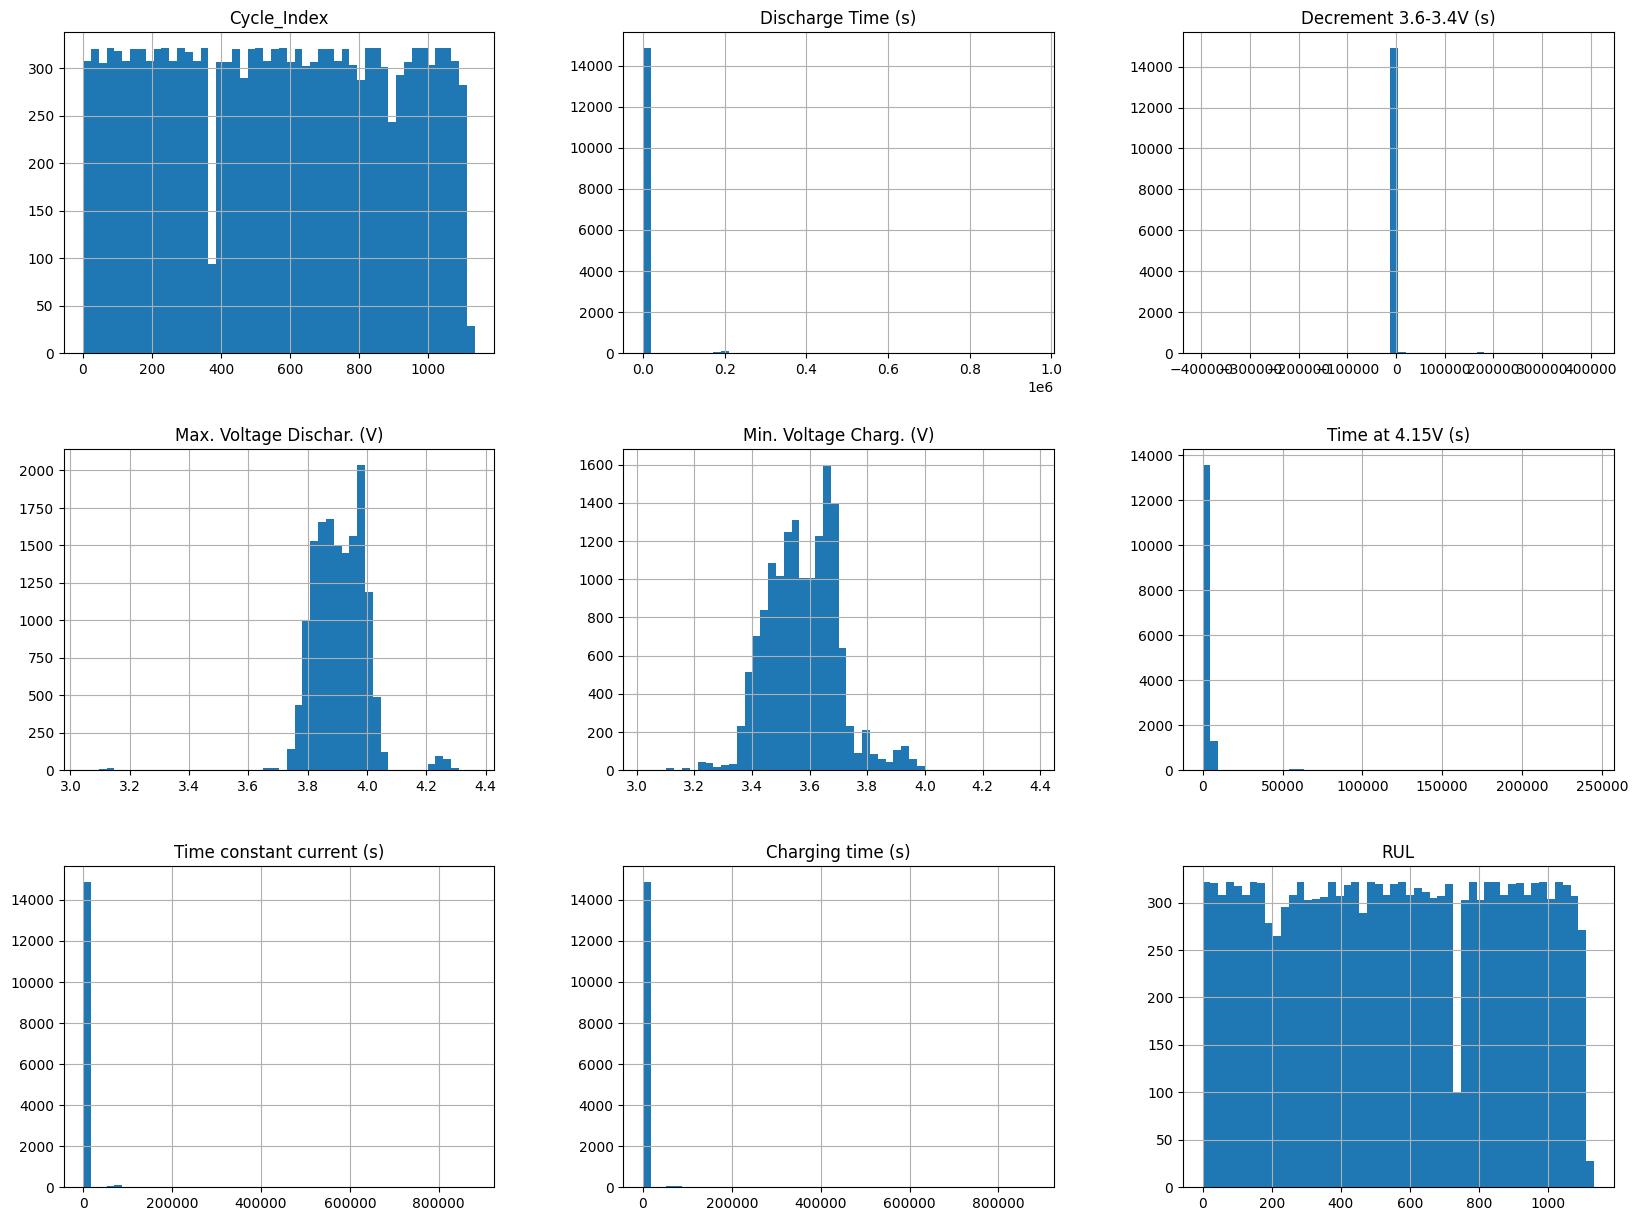

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

HNEI_df.hist(bins=50, figsize=(20,15))
plt.show()


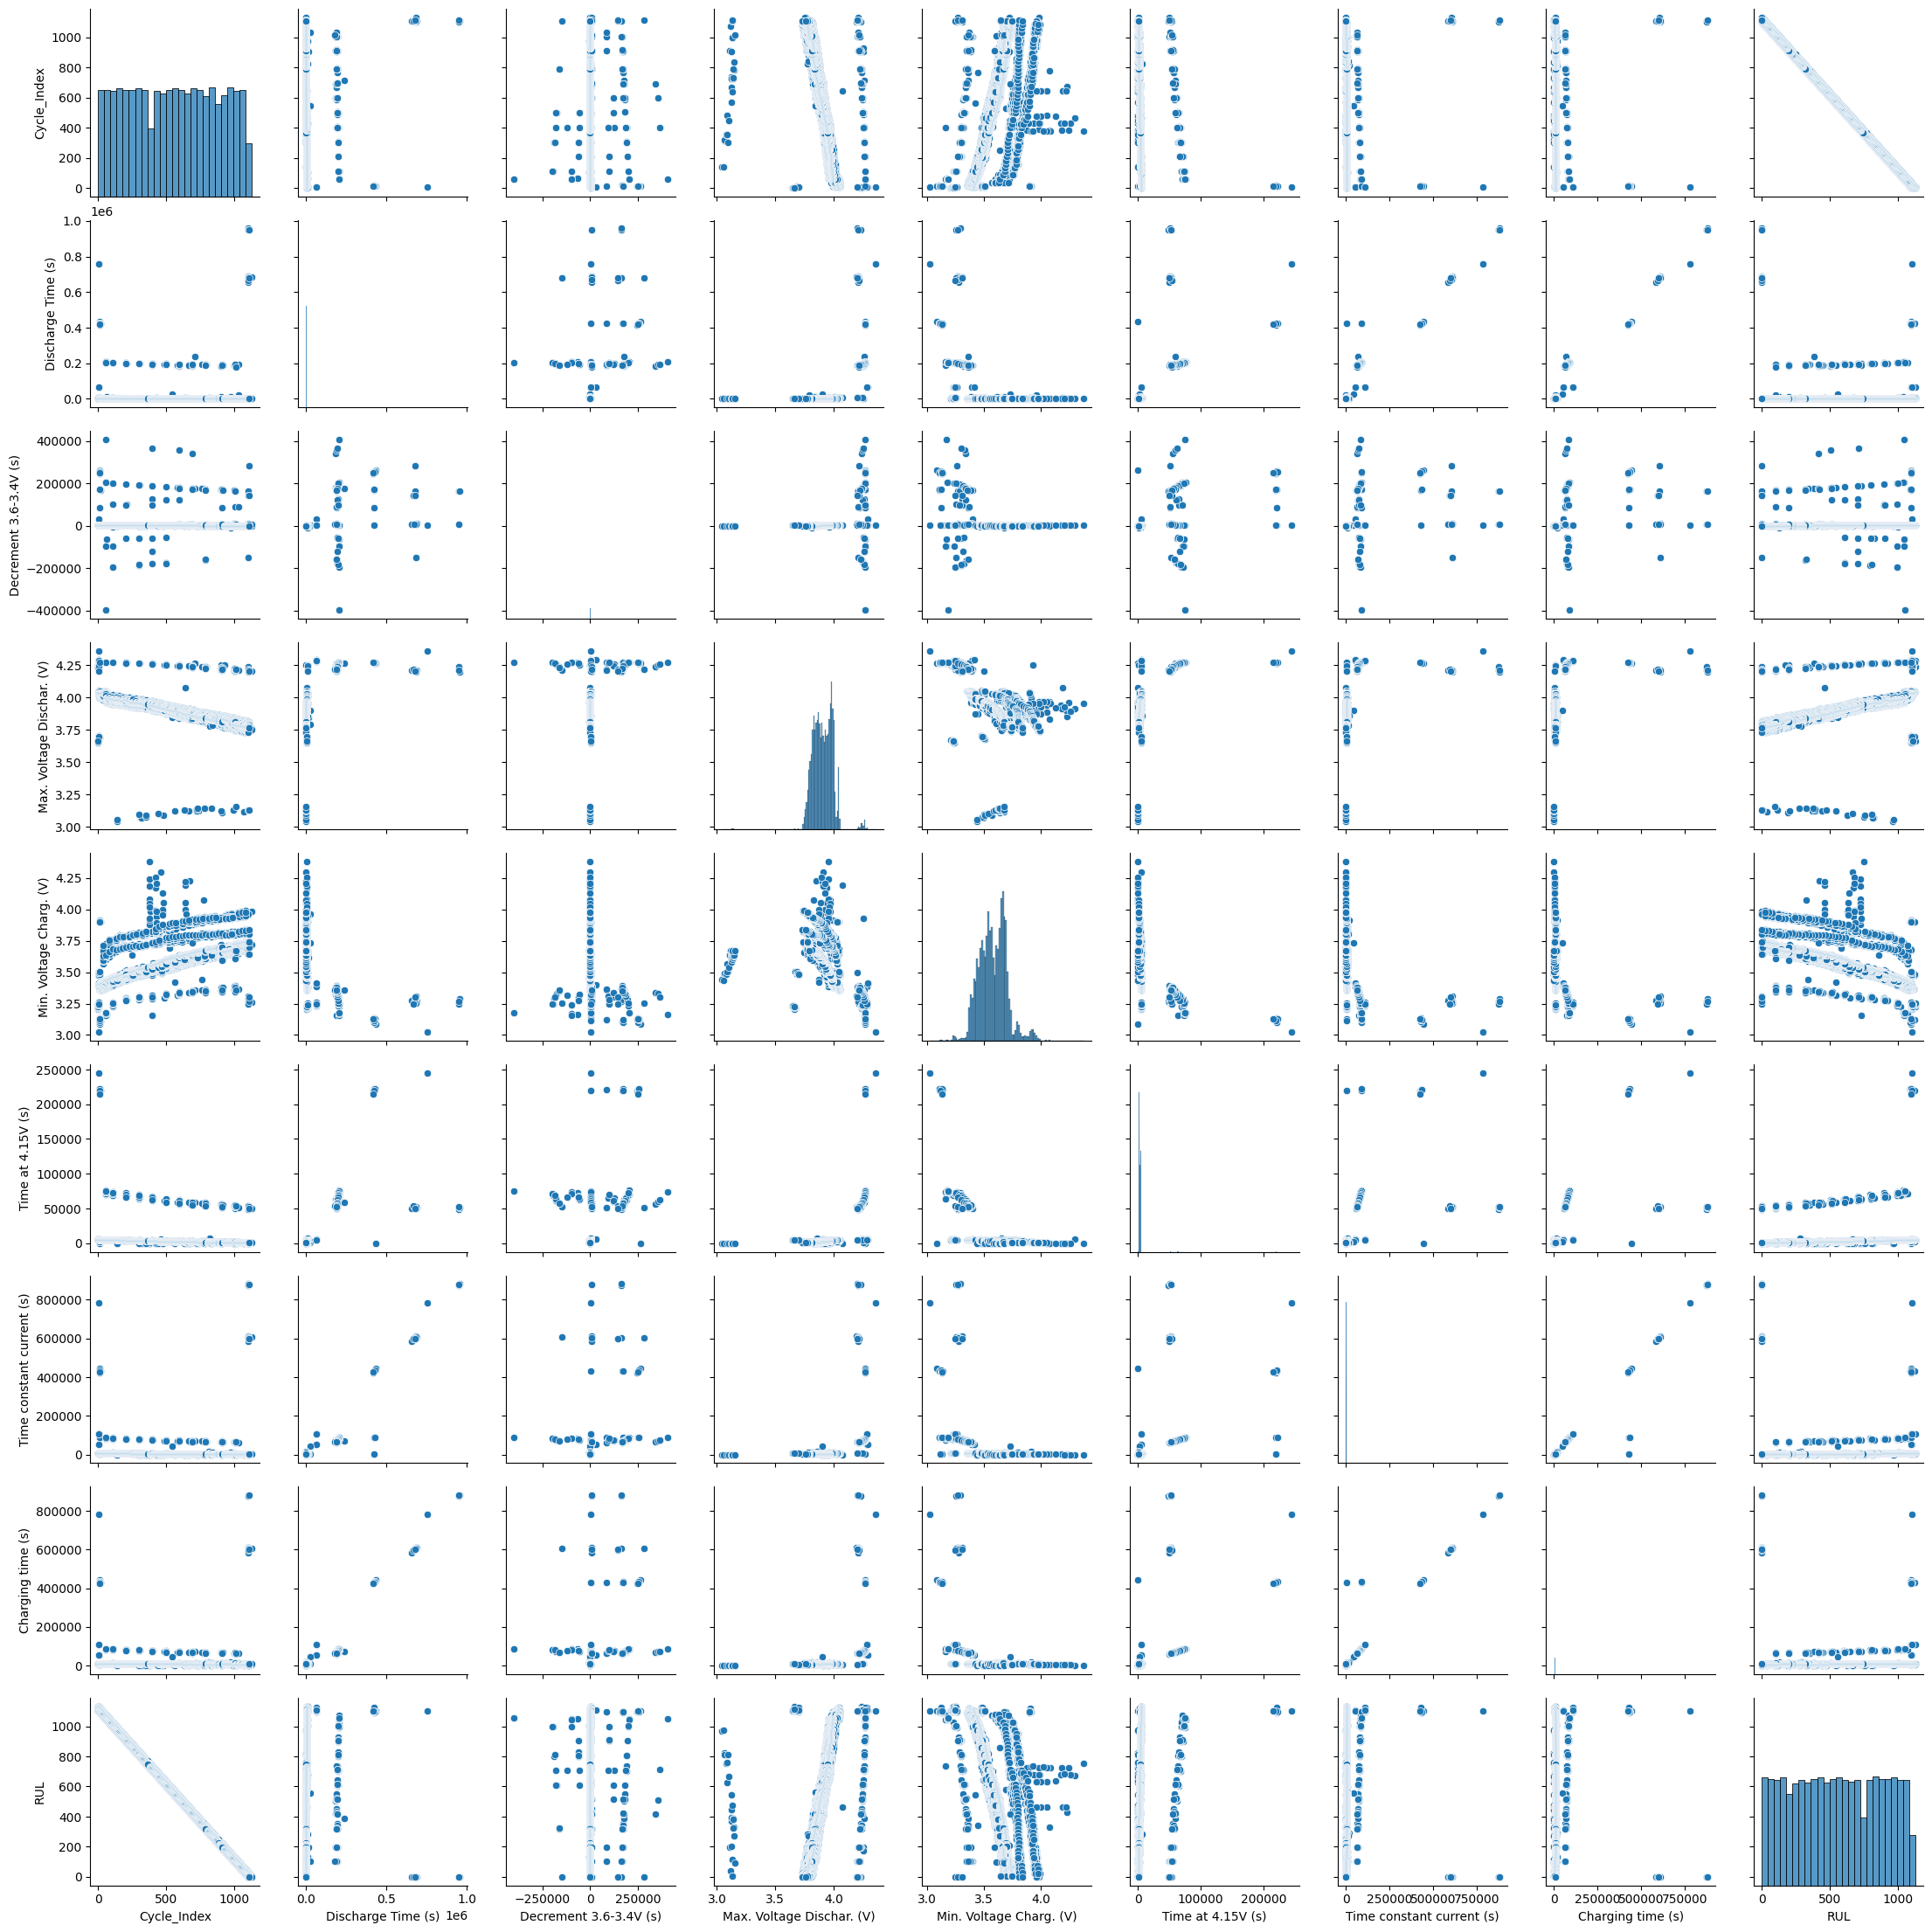

In [ ]:
sns.pairplot(HNEI_df)
plt.show()

<Axes: >

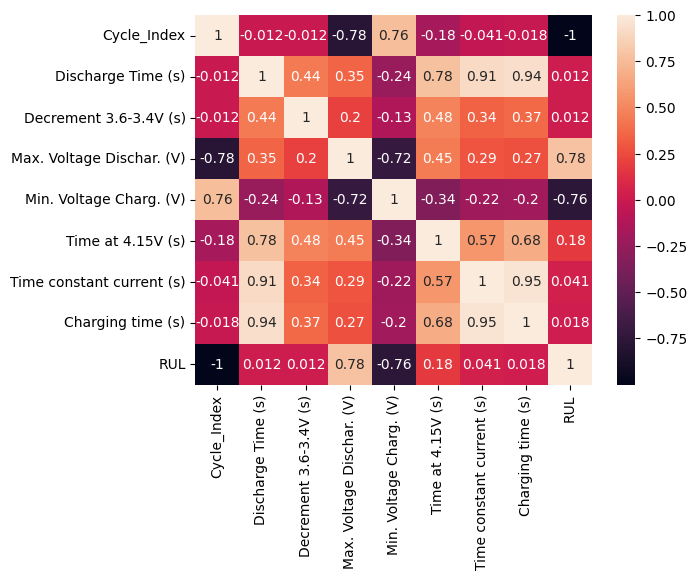

In [ ]:
sns.heatmap(HNEI_df.corr(), annot=True)


In [ ]:
HNEI_df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

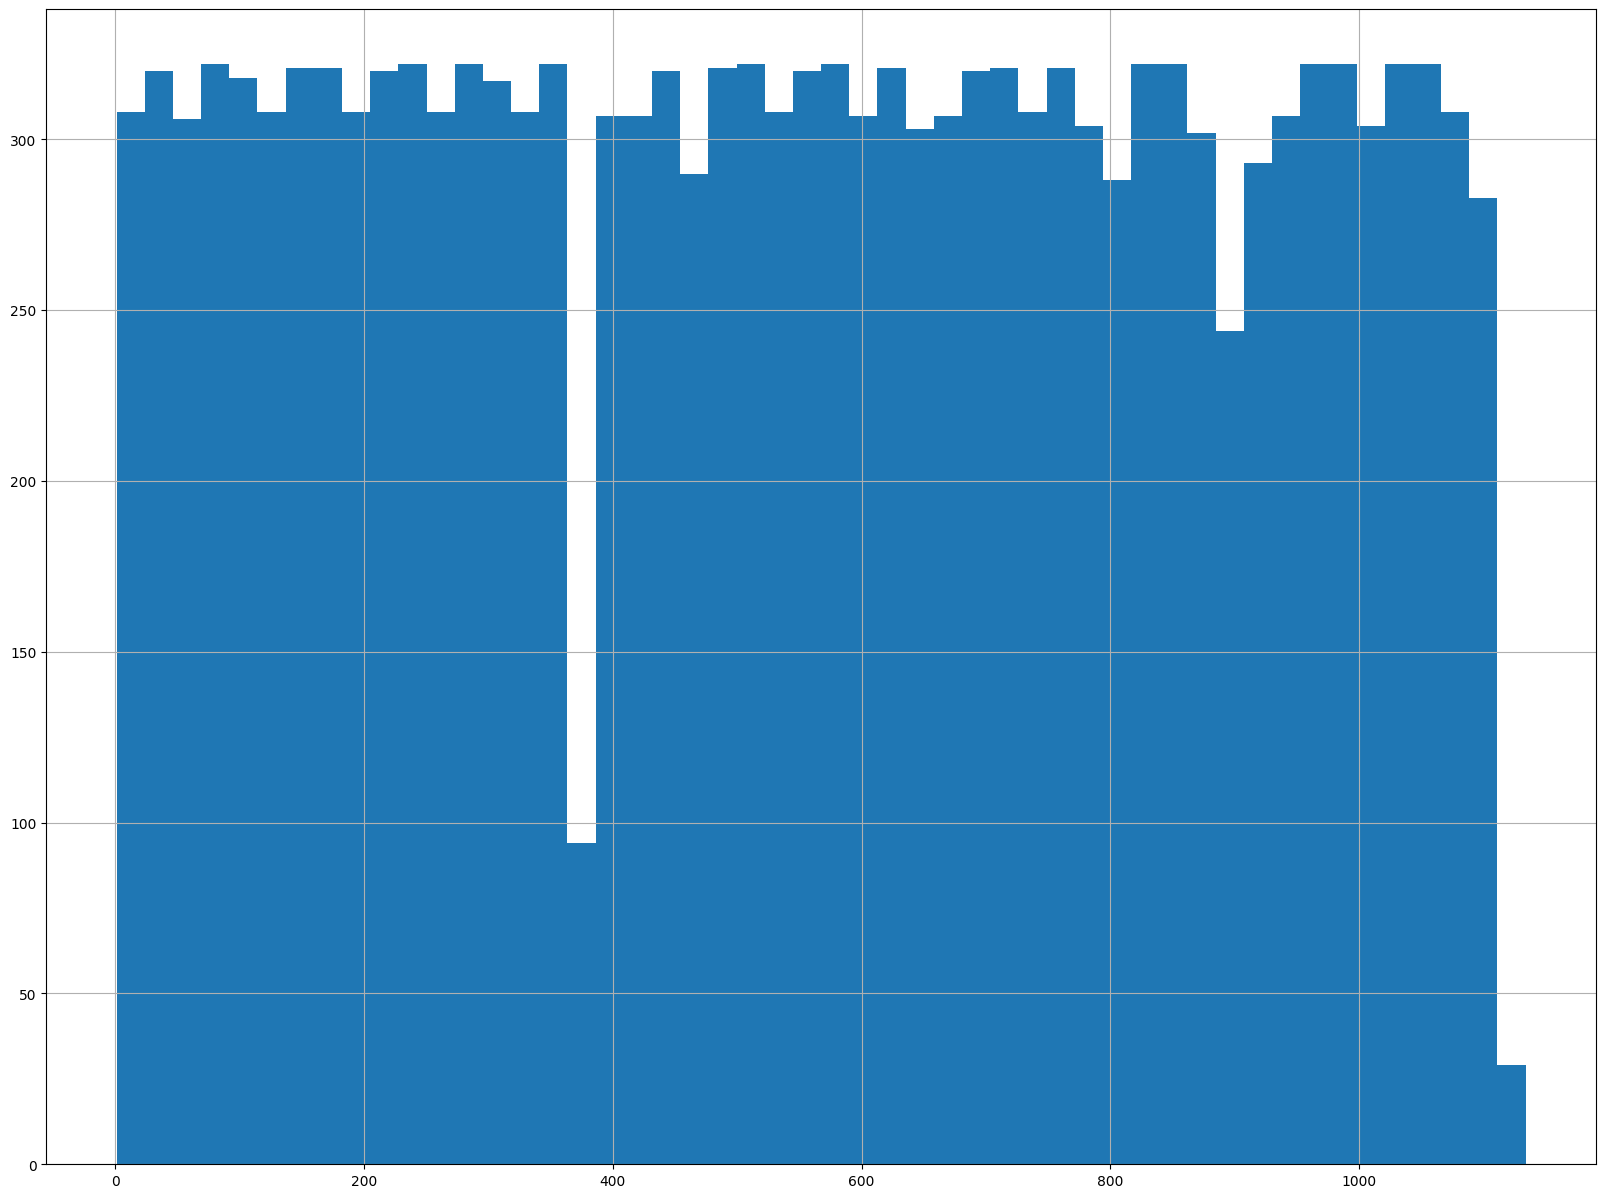

In [ ]:
HNEI_df['Cycle_Index'].hist( bins=50, figsize=(20,15))
plt.show()

In [ ]:
Batter_indices = HNEI_df[HNEI_df['Cycle_Index']==1].index #There is 14 0f them I can group these batteries

In [ ]:
Batter_indices

Index([    0,  1076,  2155,  3232,  4313,  5390,  6468,  7549,  8629,  9708,
       10787, 11864, 12941, 14013],
      dtype='int64')

In [ ]:
HNEI_df.loc[0:1076-1]

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
1071,1109.0,928.00,247.178571,3.810,3.709,1232.250,1844.25,7071.31,4
1072,1110.0,925.25,246.000000,3.808,3.707,1232.250,1844.25,6985.12,3
1073,1111.0,920.25,243.750000,3.807,3.708,1227.875,1844.38,6994.44,2
1074,1112.0,906.94,233.969000,3.795,3.825,854.375,1582.00,7776.75,1


In [ ]:
x = 0
prev = 0
for value in Batter_indices:
  value = value -1
  Battery_df = HNEI_df.loc[prev :value]
  prev = value
  Battery_df.to_csv(f'Battery_{x}.csv', index=False)
  x += 1



In [ ]:
battery_1 = pd.read_csv('Battery_1.csv')
battery_1

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
1071,1109.0,928.00,247.178571,3.810,3.709,1232.250,1844.25,7071.31,4
1072,1110.0,925.25,246.000000,3.808,3.707,1232.250,1844.25,6985.12,3
1073,1111.0,920.25,243.750000,3.807,3.708,1227.875,1844.38,6994.44,2
1074,1112.0,906.94,233.969000,3.795,3.825,854.375,1582.00,7776.75,1


In [ ]:
battery_id = 0

def add_id(Cycle_Index):
  global battery_id
  if Cycle_Index == 1:
    battery_id = battery_id +1
  return battery_id


HNEI_df['battery_id'] = HNEI_df['Cycle_Index'].apply(add_id)


In [ ]:
HNEI_df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1
...,...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4,14
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3,14
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2,14
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1,14


In [ ]:
HNEI_df[HNEI_df['Cycle_Index']==1] #There is 14 0f them I can group these batteries

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id
0,1.0,2595.30,1151.4885,3.670,3.211,5460.001,6755.01,10777.82,1112,1
1076,1.0,2604.00,1186.4955,3.666,3.213,5424.991,6706.02,10772.99,1107,2
2155,1.0,2562.02,1140.9910,3.666,3.219,5452.993,6740.99,10836.00,1107,3
3232,1.0,2566.08,1161.9830,3.667,3.214,5452.992,6740.99,10938.33,1107,4
4313,1.0,2590.02,1239.0070,3.660,3.225,5376.000,6678.01,10821.98,1133,5
5390,1.0,2609.47,1372.0000,3.650,3.228,5348.000,6678.02,11078.56,1102,6
6468,1.0,2590.98,1154.9760,3.667,3.224,5452.992,6727.01,10819.42,1107,7
7549,1.0,2590.50,1169.0240,3.667,3.206,5446.016,6734.02,10759.26,1104,8
8629,1.0,2565.31,1186.4965,3.664,3.221,5439.007,6740.99,10999.07,1107,9
9708,1.0,2587.94,1231.9990,3.661,3.223,5383.009,6678.02,10856.83,1107,10


In [ ]:
HNEI_df.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756,-0.002697
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957,-0.003224
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998,-0.016640
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800,-0.032449
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805,0.031413
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514,-0.005668
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675,-0.003319
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299,0.001592
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000,0.000889
battery_id,-0.002697,-0.003224,-0.016640,-0.032449,0.031413,-0.005668,-0.003319,0.001592,0.000889,1.000000


In [ ]:
for i in range (1,15):
  max = HNEI_df[HNEI_df['battery_id']==i]['RUL'].max()
  print(f'for battery {i} the max is {max}')

for battery 1 the max is 1112
for battery 2 the max is 1107
for battery 3 the max is 1107
for battery 4 the max is 1107
for battery 5 the max is 1133
for battery 6 the max is 1102
for battery 7 the max is 1107
for battery 8 the max is 1104
for battery 9 the max is 1107
for battery 10 the max is 1107
for battery 11 the max is 1107
for battery 12 the max is 1107
for battery 13 the max is 1113
for battery 14 the max is 1111


In [ ]:
#HNEI_df.drop(['Cycle_Index'], axis = 1, inplace = True)
HNEI_df

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1
...,...,...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4,14
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3,14
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2,14
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1,14


In [ ]:
# I want to split the data by removing a certain percentage of each battery at the end not randomly
x = HNEI_df.drop(['RUL'], axis = 1)
y = HNEI_df['RUL']

In [ ]:
x[x['battery_id'] == 1].tail(10).index

Index([1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075], dtype='int64')

In [ ]:
#let's make the indices for the test sets

test_indices = []

for i in range (1,15):
   test_index = test_indices.append(x[x['battery_id'] == i].tail(200).index)



In [ ]:
# Flatten the list of Index objects into a single list of indices
flat_test_indices = [idx for index_list in test_indices for idx in index_list]

# Select the rows using the flattened list of indices
x.loc[flat_test_indices]

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),battery_id
876,1119.91,321.601500,3.849,3.807,1477.344000,2303.02,7935.33,1
877,191180.17,168943.684000,4.228,3.353,54540.004000,65881.38,65881.38,1
878,1115.20,312.171429,3.840,3.601,2699.320000,3860.32,11610.72,1
879,1126.27,310.971429,3.849,3.675,1710.669714,2420.38,7640.61,1
880,1132.13,312.000000,3.852,3.672,1746.637714,2456.35,7437.06,1
...,...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775000,1412.38,6678.88,14
15060,771.12,179.523810,3.773,3.744,915.512000,1412.31,6670.38,14
15061,769.12,179.357143,3.773,3.742,915.513000,1412.31,6637.12,14
15062,773.88,162.374667,3.763,3.839,539.375000,1148.00,7660.62,14


In [ ]:
y

,RUL
0,1112
1,1111
2,1110
3,1109
4,1107
...,...
15059,4
15060,3
15061,2
15062,1


In [ ]:
#Okay let's start of with a linear Regression Model

In [ ]:
# Select the corresponding rows for y using the flattened list of indices
y_test = y.loc[flat_test_indices]

# Select the test sets for x
x_test = x.loc[flat_test_indices]

# Create the training indices by dropping the test indices from the original index
train_indices = x.index.drop(flat_test_indices)

# Select the training sets for x and y
x_train = x.loc[train_indices]
y_train = y.loc[train_indices]

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (12264, 8)
Shape of x_test: (2800, 8)
Shape of y_train: (12264,)
Shape of y_test: (2800,)


In [ ]:
x_test

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),battery_id
876,1119.91,321.601500,3.849,3.807,1477.344000,2303.02,7935.33,1
877,191180.17,168943.684000,4.228,3.353,54540.004000,65881.38,65881.38,1
878,1115.20,312.171429,3.840,3.601,2699.320000,3860.32,11610.72,1
879,1126.27,310.971429,3.849,3.675,1710.669714,2420.38,7640.61,1
880,1132.13,312.000000,3.852,3.672,1746.637714,2456.35,7437.06,1
...,...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775000,1412.38,6678.88,14
15060,771.12,179.523810,3.773,3.744,915.512000,1412.31,6670.38,14
15061,769.12,179.357143,3.773,3.742,915.513000,1412.31,6637.12,14
15062,773.88,162.374667,3.763,3.839,539.375000,1148.00,7660.62,14


In [ ]:
y_test

,RUL
876,199
877,198
878,197
879,196
880,195
...,...
15059,4
15060,3
15061,2
15062,1


In [ ]:
#the model as you will see below is very terrible, but that is the first iteration I will pycaret to make the iterating faster from now on
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, predictions)

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 99748.59698430219
R-squared (R2) Score: -28.455222251934547


In [ ]:
HNEI_df.drop(['Cycle_Index'], axis = 1, inplace = True) # this will cause extreme data leakage but I also have the batteryID

In [ ]:
from pycaret.regression import *
exp_reg = setup(HNEI_df, target = 'RUL', verbose=False, session_id=1)

In [ ]:
%pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
# Compare different regression models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.3875,255.5349,15.4119,0.9976,0.1460,0.0722,2.8800
rf,Random Forest Regressor,6.6610,328.3948,17.3442,0.9968,0.1692,0.0910,6.5360
lightgbm,Light Gradient Boosting Machine,9.8909,406.6695,19.4322,0.9961,0.1899,0.0941,2.1970
xgboost,Extreme Gradient Boosting,7.6004,409.3833,19.3454,0.9961,0.1644,0.0748,0.2700
dt,Decision Tree Regressor,8.4705,844.5680,28.1464,0.9919,0.2075,0.0795,0.1040
gbr,Gradient Boosting Regressor,19.8909,866.0375,29.2266,0.9917,0.2848,0.2092,1.8970
knn,K Neighbors Regressor,24.9401,1942.1110,43.7657,0.9813,0.2703,0.2080,0.0450
ada,AdaBoost Regressor,56.3928,4806.5070,69.2578,0.9538,0.5136,0.6678,0.7990
lr,Linear Regression,92.7406,21406.9629,145.5947,0.7942,0.6275,0.8346,0.7140
br,Bayesian Ridge,92.7619,21435.9473,145.6871,0.7939,0.6299,0.8346,0.0300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Create Extra Trees Regressor model
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.6040,197.0589,14.0378,0.9981,0.2065,0.1146
1,5.1747,147.8484,12.1593,0.9986,0.2122,0.0702
2,5.6355,425.3645,20.6244,0.9959,0.1279,0.0551
3,5.3515,620.5683,24.9112,0.9942,0.1006,0.0303
4,5.1866,202.4198,14.2274,0.9979,0.1518,0.0996
5,5.6643,288.0472,16.9720,0.9973,0.1691,0.0896
6,6.0566,228.8360,15.1273,0.9978,0.1735,0.1122
7,5.5542,218.9227,14.7960,0.9979,0.1646,0.0977
8,4.9142,120.0587,10.9571,0.9988,0.0717,0.0244


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Make predictions on the test set
predictions = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.1246,226.1176,15.0372,0.9978,0.1605,0.0967


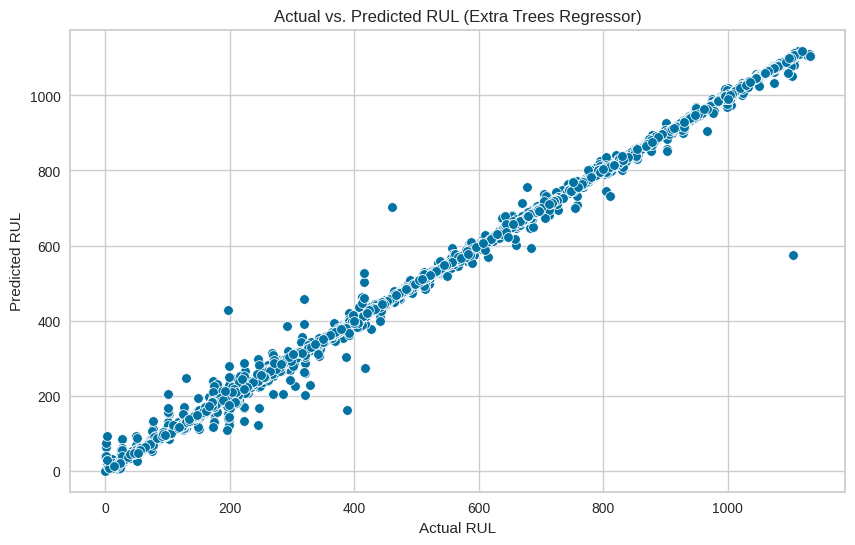

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted RUL
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RUL', y='prediction_label', data=predictions)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL (Extra Trees Regressor)")
plt.show()

In [ ]:
rf = create_model('rf')
light = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7300,196.7117,14.0254,0.9981,0.2338,0.1593
1,6.7054,260.8747,16.1516,0.9975,0.2249,0.0819
2,6.2116,127.9280,11.3105,0.9988,0.1489,0.0755
3,6.2109,313.2118,17.6978,0.9971,0.1662,0.0436
4,6.5746,315.1992,17.7539,0.9968,0.1592,0.1026
5,7.6152,947.6918,30.7846,0.9910,0.1986,0.1445
6,7.3503,446.9167,21.1404,0.9958,0.1789,0.1267
7,6.7030,316.3767,17.7870,0.9970,0.1740,0.0980
8,6.2838,187.1479,13.6802,0.9982,0.0825,0.0308


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.6926,306.0199,17.4934,0.9970,0.2594,0.1482
1,9.3625,241.8155,15.5504,0.9976,0.2414,0.0630
2,9.7698,217.9935,14.7646,0.9979,0.1441,0.0799
3,9.8719,674.2502,25.9663,0.9937,0.1639,0.0685
4,9.9256,357.5218,18.9082,0.9964,0.1983,0.0999
5,11.2781,1051.6042,32.4284,0.9900,0.2346,0.1302
6,10.3301,346.3647,18.6109,0.9967,0.1928,0.0838
7,9.8508,406.8646,20.1709,0.9962,0.2067,0.1503
8,9.4489,207.6533,14.4102,0.9980,0.1123,0.0502


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ensem = blend_models(estimator_list = [rf, light, et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.6330,160.0422,12.6508,0.9984,0.2392,0.1366
1,6.4675,171.4510,13.0939,0.9983,0.2189,0.0688
2,6.4400,168.4060,12.9771,0.9984,0.1339,0.0658
3,6.6136,447.4488,21.1530,0.9958,0.1414,0.0448
4,6.5501,237.7642,15.4196,0.9976,0.1697,0.0979
5,7.5168,623.6813,24.9736,0.9941,0.2048,0.1188
6,7.3897,283.6195,16.8410,0.9973,0.1817,0.1052
7,6.8020,251.4335,15.8567,0.9976,0.1790,0.1125
8,6.2645,131.4295,11.4643,0.9987,0.0827,0.0324


Processing:   0%|          | 0/6 [00:00<?, ?it/s]